# Part 1 - Gradient Descent

In [440]:
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

## Generate Synthetic Data

In [441]:
"""
Generate 200 randomly generated values of X between −10 and 10.
"""
np.random.seed(42)
X = 20 * np.random.rand(200, 1) - 10

"""
Generate the target variable y using the function 5x^4 +2x^3 +9x +12. This is your model.
"""
y = 5*X**4 +2*X**3 +9*X +12 +1000*np.random.randn(len(X), 1)

"""
The bias term Xbias is initialized to 1.
"""
# I refer to Xbias as x_terms throughout my code
def create_X_terms(X):
  m = len(X)
  return np.c_[X**4, X**3, X, np.ones((m, 1))]

## Implement Gradient Descent

In [445]:
# calculate predicted_y using these theta values
def predict_y(X_terms, theta):
  return np.dot(X_terms, theta)

"""
Use the variable name compute_error to calculate the Root Mean Squared Error (RMSE) between the predicted and actual target values.
"""
# moved this step to where it made more sense to me
def RMSE(y, y_predicted):
  return sqrt(np.mean((y - y_predicted) ** 2))

"""
Define a function gradient descent to perform Gradient Descent and return the optimized weights, θ.
"""
def gradient_descent(learning_rate, n_iterations, X, y_actual):
  X_terms = create_X_terms(X)

  """
  Initialize the weights randomly.
  """
  theta = np.random.randn(4,1)
  y_predicted = predict_y(X_terms, theta)

  for iteration in range(n_iterations):

    # compute gradient of cost function
    gradients = 2/len(X) * X_terms.T.dot(y_predicted - y_actual)

    # update weights
    theta -= learning_rate * gradients
    y_predicted = predict_y(X_terms, theta)

  compute_error = RMSE(y_actual, y_predicted)

  # output
  print(f"Learning Rate: {learning_rate}; RMSE: {compute_error}")
  return theta

## Hyperparameters

In [371]:
def final_display(learning_rate, n_iterations, X, y):
  X_new = np.linspace(-10, 10, 400).reshape(400, 1)
  X_terms_new = create_X_terms(X_new)
  theta = gradient_descent(learning_rate, n_iterations, X, y)
  y_predict = predict_y(X_terms_new, theta)
  plt.scatter(X, y)
  plt.plot(X_new, y_predict, "r-",
    label="(%.4f)$x^4$ + (%.4f)$x^3$ + (%.4f)x + (%.4f)" % (theta[0], theta[1], theta[2], theta[3]))
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()


"""
Run the experiment with different learning rates (LR) and observe how it affects the convergence of the algorithm. Use: LR: 0.001, 0.01, 0.0005.
"""
gradient_descent(0.001, 50, X, y)
gradient_descent(0.01, 50, X, y)
gradient_descent(0.0005, 50, X, y)

"""
Display the final RMSE for each learning rate.
"""

Learning Rate: 0.001; RMSE: inf
Learning Rate: 0.01; RMSE: inf
Learning Rate: 0.0005; RMSE: inf


<ipython-input-351-2ee83bf842d8>:6: RuntimeWarning: overflow encountered in square
  return sqrt(np.mean((y - y_predicted) ** 2))


'\nDisplay the final RMSE for each learning rate.\n'

Learning Rate: 1e-07; RMSE: 45751548.6744426


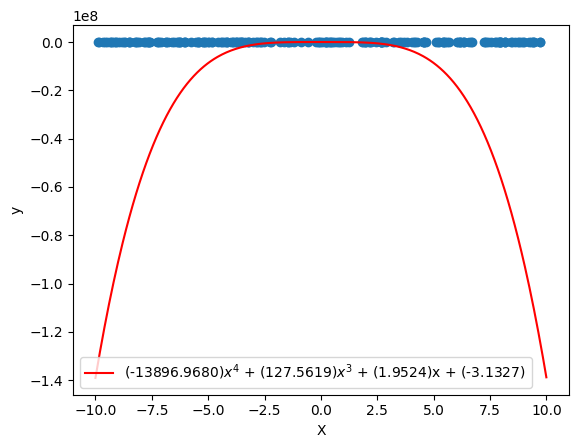

In [368]:
final_display(0.0000001, 50, X, y)

Learning Rate: 1e-08; RMSE: 1053.5240920622048


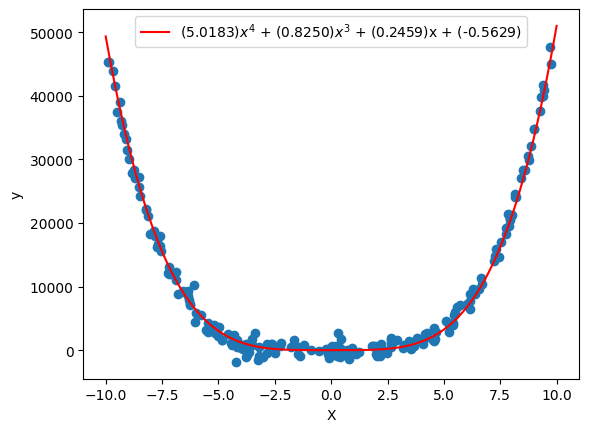

In [369]:
final_display(0.00000001, 50, X, y)

Learning Rate: 1e-09; RMSE: 7014.565102554403


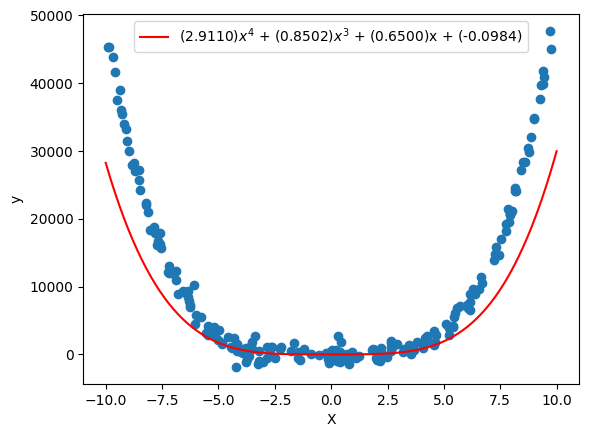

In [370]:
final_display(0.000000001, 50, X, y)

## Submission

In [ ]:
"""
Final Output: should look like this: Learning Rate: 0.001; RMSE: XXXX.XXXX, where this is the computed error. Repeat for all 3 LRs.
Example:
Learning Rate: 0.001; RMSE: 3523.1301
Learning Rate: 0.01; RMSE: 9813.8717
Learning Rate: 0.0005; RMSE: 1332.2333
"""
# I included the learning rates listed above, but they seemed to be too large
# I included smaller learning rates as well to show better predictions of the weights
# as shown above, a learning rate of 1e-08 is most optimal out of the learning rates included
# however, only the weight of the x^4 term is close to the true value of the equation
# the other learning rates have much larger RMSE
# the RMSE of the required learning rates is infinity
# y_predict could not even be graphed for the required learning rates
# increasing iterations to 100 also seemed to lead to worse values

"""
Include well-commented Python code for all the tasks above.
"""


# Part 2 - Logistic Regression

In [434]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Load and Preprocess the Iris Dataset

In [435]:
"""
Load the Iris dataset from sklearn.datasets.
"""
iris = load_iris()

"""
Extract only the first two classes to make it a binary classification problem.
"""
iris_data = pd.DataFrame(data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"])
iris_data = iris_data.loc[iris_data["target"] != 2.0]

"""
Split the dataset into features (X) and target labels (y).
"""
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

"""
Split the dataset into training and testing sets using train test split with test size=0.2 and random state=42.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

"""
Use the following code for feature scaling.
Standardize the features using:
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [436]:
"""
Train a Logistic Regression model using LogisticRegression from sklearn.linear model on the training data.
Keep the default parameters.
"""
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Make Predictions

In [437]:
"""
Predict the classes and print them.
"""
predictions = log_reg.predict(X_test)
print(predictions)

[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]


## Performance Metrics Calculation (NO using sklearn)

In [446]:
"""
Manually calculate and print the True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) using the actual and predicted classes.
"""
# pregnant=P=1; not pregnant=N=0 (using pregnancy to think through T/F N/P)
# TP: pregnancy test predicts pregnancy, woman is pregnant; predicted=1, actual=1
# TN: pregnancy test predicts not pregnant, woman is not pregnant; predicted=0, actual=0
# FP: pregnancy test predicts pregnant, woman is not pregnant; predicted=1, actual=0
# FN: pregnancy test predicts not pregnant, woman is pregnant; predicted=0, actual=1
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(predictions)):
  if predictions[i] == 1:
    if y_test[i] == 1:
      TP += 1;
    else:
      FP += 1;
  else:
    if y_test[i] == 0:
      TN += 1;
    else:
      FN += 1;

print("True Positives: ", TP)
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)

"""
Manually calculate and print the Root Mean Squared Error (RMSE).
"""
RMSE = RMSE(y_test, predictions) # function defined in part 1
print("RMSE: ", RMSE)

True Positives:  8
True Negatives:  12
False Positives:  0
False Negatives:  0
RMSE:  0.0
